In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import pickle
from sklearn.metrics import accuracy_score as acc

%matplotlib inline

In [2]:
diabetes=pd.read_csv('diabetes_data_upload.csv')

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
diabetes.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
diabetes['Polyuria'] = diabetes['Polyuria'].map({'Yes': 1, 'No': 0})
diabetes['Polydipsia'] = diabetes['Polydipsia'].map({'Yes': 1, 'No': 0})
diabetes['sudden weight loss'] = diabetes['sudden weight loss'].map({'Yes': 1, 'No': 0})
diabetes['weakness'] = diabetes['weakness'].map({'Yes': 1, 'No': 0})
diabetes['Polyphagia'] = diabetes['Polyphagia'].map({'Yes': 1, 'No': 0})
diabetes['Genital thrush'] = diabetes['Genital thrush'].map({'Yes': 1, 'No': 0})
diabetes['visual blurring'] = diabetes['visual blurring'].map({'Yes': 1, 'No': 0})
diabetes['Itching'] = diabetes['Itching'].map({'Yes': 1, 'No': 0})
diabetes['Irritability'] = diabetes['Irritability'].map({'Yes': 1, 'No': 0})
diabetes['delayed healing'] = diabetes['delayed healing'].map({'Yes': 1, 'No': 0})
diabetes['partial paresis'] = diabetes['partial paresis'].map({'Yes': 1, 'No': 0})
diabetes['muscle stiffness'] = diabetes['muscle stiffness'].map({'Yes': 1, 'No': 0})
diabetes['Alopecia'] = diabetes['Alopecia'].map({'Yes': 1, 'No': 0})
diabetes['Obesity'] = diabetes['Obesity'].map({'Yes': 1, 'No': 0})
diabetes['class'] = diabetes['class'].map({'Positive': 1, 'Negative': 0})

In [7]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [8]:
diabetes.shape

(520, 17)

In [9]:
diabetes.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop(['Gender','class'],axis=1), diabetes['class'], test_size=0.33, random_state=55)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC , SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

models= {
    'LogisticRegrsssion ': LogisticRegression(),
    'K-NearstNeighbors  ': KNeighborsClassifier(),
    '      DecisionTree ': DecisionTreeClassifier(),
    'SVM       (Linear) ': LinearSVC(),
    '              SVM  ': SVC(),
    '    Randomforest   ': RandomForestClassifier(),
    'GradientBoosting   ': GradientBoostingClassifier(),
        
   
}
for name,model1 in models.items():
    model1.fit(X_train,y_train)
    print(name+ ': trained')

c:\Users\Mahdi-e\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mahdi-e\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegrsssion : trained
K-NearstNeighbors  : trained
      DecisionTree : trained
SVM       (Linear) : trained
              SVM  : trained
    Randomforest   : trained
GradientBoosting   : trained


In [12]:
for name,model1 in models.items():
    print(name+"Model accuracy" +": {:.2f}%".format(model1.score(X_test,y_test) * 100))

LogisticRegrsssion Model accuracy: 87.79%
K-NearstNeighbors  Model accuracy: 86.63%
      DecisionTree Model accuracy: 95.93%
SVM       (Linear) Model accuracy: 80.81%
              SVM  Model accuracy: 65.12%
    Randomforest   Model accuracy: 95.93%
GradientBoosting   Model accuracy: 94.77%


In [13]:
model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)

ExtraTreesClassifier(random_state=0)

In [14]:

pred = model.predict(X_test)
print(pred)
accuracy = model.score(X_test, y_test)
print(f"ExtraTreesClassifier Model accuracy : {round(acc(y_test, pred) * 100, 2)}%")
# print("ExtraTreesClassifier Model accuracy",accuracy)

[1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0
 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0]
ExtraTreesClassifier Model accuracy : 96.51%


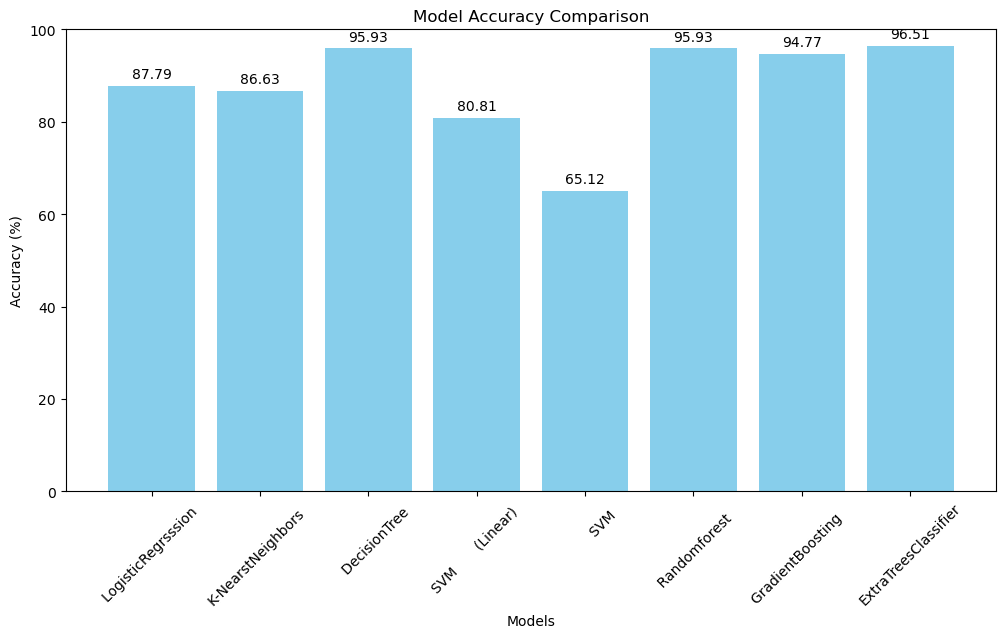

In [32]:
import matplotlib.pyplot as plt

model_accuracies = []
model_names = []

for name, model1 in models.items():
    model_names.append(name)
    model_accuracies.append(model1.score(X_test, y_test) * 100)

model_names.append("ExtraTreesClassifier")
model_accuracies.append(accuracy * 100)

plt.figure(figsize=(12, 6))
plt.bar(model_names, model_accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 100)

for index, value in enumerate(model_accuracies):
    plt.text(index, value + 1, str(round(value, 2)), ha='center', va='bottom')

plt.show()

In [15]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)


F1 Score:  0.972972972972973


In [16]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("ROC-AUC: ", roc_auc)

ROC-AUC:  0.9961309523809524


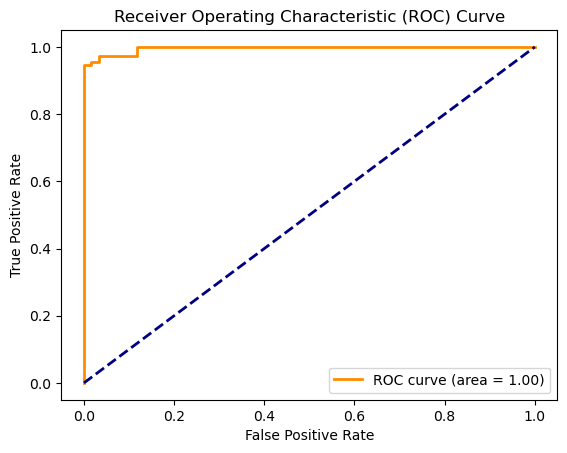

In [17]:

y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
cm = confusion_matrix(y_test, pred)

TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

print("True Positive (TP):", TP)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

True Positive (TP): 108
False Positive (FP): 2
False Negative (FN): 4


In [19]:
def calculate_metrics(TP, FP, FN):
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    
    if recall + precision == 0:
        f_measure = 0
    else:
        f_measure = 2 * (precision * recall) / (precision + recall)
    
    return recall, precision, f_measure

recall, precision, f_measure = calculate_metrics(TP, FP, FN)

print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F-measure: {:.2f}".format(f_measure))

Recall: 0.96
Precision: 0.98
F-measure: 0.97


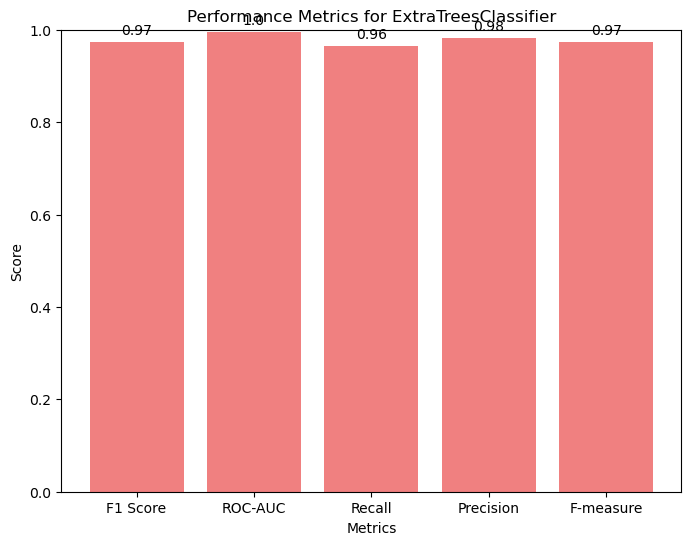

In [35]:
import matplotlib.pyplot as plt

metrics = ['F1 Score', 'ROC-AUC', 'Recall', 'Precision', 'F-measure']
values = [f1, roc_auc, recall, precision, f_measure]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='lightcoral')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics for ExtraTreesClassifier')
plt.ylim(0, 1)

for index, value in enumerate(values):
    plt.text(index, value + 0.01, str(round(value, 2)), ha='center', va='bottom')

plt.show()

In [20]:
y_test

139    1
25     1
53     1
300    1
402    0
      ..
223    0
381    1
307    0
199    1
55     1
Name: class, Length: 172, dtype: int64

In [21]:
age=int(input("Enter Your Age: "))
gender=input("Enter Your Gender: ")
print("Answer The Following Questions In A Binary Format. (0 For No And 1 For Yes)")
polyuria=int(input("Do You Have Polyuria: "))
polydipsia=int(input("Do You Have Polydipsia: "))
sudden_weight_loss=int(input("Are You Having Sudden Weight Loss?: "))
weakness=int(input("Are You Having Weakness?: "))
polyphagia=int(input("Do You Have Polyphagia?: "))
genital_thrush=int(input("Do You Have Genital Thrush?: "))
visual_blurring=int(input("Do You Have Visual Blurring?: "))
itching=int(input("Do You Have Itching?: "))
irritatibility=int(input("Do You Have Irritatibility?: "))
delayed_healing=int(input("Do You Have Delayed Healing?: "))
partial_paresis=int(input("Do You Have Partial Paresis?: "))
muscle_stiffness=int(input("Do You Have Muscle Stiffness?: "))
alopecia=int(input("Do You Have Alopecia?: "))
obesity=int(input("Do You Have Obesity?: "))

Answer The Following Questions In A Binary Format. (0 For No And 1 For Yes)


In [22]:
prop=[]
prop.extend([age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritatibility,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity])

In [23]:
prop_data=pd.DataFrame(columns=['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'])

In [24]:
prop_data.loc[len(prop)] = prop

In [25]:
pred=model.predict(prop_data)
if(pred==1):
    print("RISK")
else:
    print("NO RISK")

RISK


In [26]:
pickle.dump(model, open('model.diabetes', 'wb'))